In [98]:
# <참고 자료 : import 라이브러리, 데이터 로드>
# 0: 티셔츠/탑 (T-shirt/top) 1: 바지 (Trouser) 2: 풀오버 (Pullover) 3: 드레스 (Dress) 4: 코트 (Coat) 5: 샌들 (Sandal) 6: 셔츠 (Shirt) 7: 스니커즈 (Sneaker) 8: 가방 (Bag) 9: 앵클 부츠 (Ankle boot)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Malgun Gothic'

In [114]:
# 1. 데이터 로드 및 전처리: keras.datasets.fashion_mnist.load_data()를 사용하여 데이터를 로드하고, 픽셀 값을 0과 1 사이로 정규화합니다.
# 데이터 로드
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0],28,28,1)).astype('float32')
test_images = test_images.reshape((test_images.shape[0],28,28,1)).astype('float32')

if len(train_labels.shape) == 1:  # shape이 (n,)인지 확인
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)  # to_categorical(원핫인코딩 대상, 클래스 갯수)
if len(test_labels.shape) == 1:  # shape이 (n,)인지 확인
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)

data_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#data_names2 = ['티셔츠/탑','바지','풀오버','드레스','코트','샌들','셔츠','스니커즈','가방','앵클 부츠']
num_names = len(data_names)
print(num_names)
print(train_labels)

10
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 2. CNN 모델 구성:
#  - Conv2D: Convolutional Layer (합성곱 층)으로, 이미지에서 특징을 추출합니다.
#  - MaxPooling2D: Max Pooling Layer (최대 풀링 층)으로, 특징 맵의 크기를 줄여 계산량을 줄이고 과적합을 방지합니다.
#  - Flatten: Flatten Layer (평탄화 층)으로, 2차원 특징 맵을 1차원 벡터로 변환합니다.
#  - Dense: Fully Connected Layer (완전 연결 층)으로, 모든 뉴런이 서로 연결되어 있습니다.
#  - softmax: 출력층의 활성화 함수로, 각 클래스에 대한 확률을 반환합니다.
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
])

model = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255, input_shape=(180, 180, 1)),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_names, activation='softmax')
])

c:\pythonEdu\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
# 3. 모델 컴파일: 손실 함수, 옵티마이저, 평가 지표를 설정합니다.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
# 4. 모델 훈련: model.fit() 함수를 사용하여 모델을 훈련합니다.
epochs = 10
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images,test_labels),
    epochs=epochs
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5499 - loss: 1.2227 - val_accuracy: 0.7145 - val_loss: 0.7465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7392 - loss: 0.7006 - val_accuracy: 0.7576 - val_loss: 0.6477
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7727 - loss: 0.6136 - val_accuracy: 0.7935 - val_loss: 0.5534
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7900 - loss: 0.5622 - val_accuracy: 0.8236 - val_loss: 0.4860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8053 - loss: 0.5276 - val_accuracy: 0.8109 - val_loss: 0.5271
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8174 - loss: 0.4974 - val_accuracy: 0.8205 - val_loss: 0.4925
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8198 - loss: 0.4886 - val_accuracy: 0.8441 - val_loss: 0.4241
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8249 - loss: 0

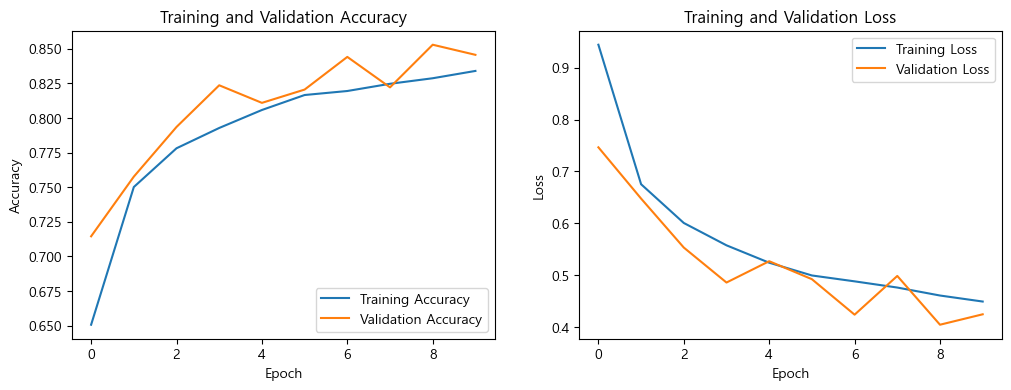

In [104]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [105]:
# 5. 모델 평가: model.evaluate() 함수를 사용하여 모델의 성능을 평가합니다.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.4288
테스트 정확도: 0.8456


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


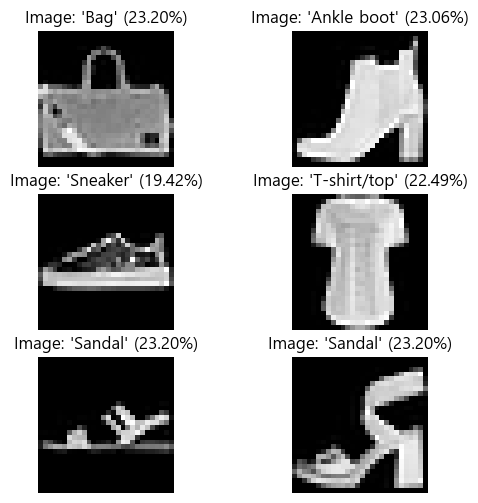

In [117]:
# 6. 예측 및 시각화 (선택 사항): model.predict() 함수를 사용하여 테스트 이미지에 대한 예측을 수행하고, 결과를 시각화합니다.
plt.figure(figsize=(6, 6))

for i in range(6):
    num = np.random.randint(0,10000,1)

    predictions = model.predict(train_images[num])
    score = tf.nn.softmax(predictions[0])

    # 이미지 시각화
    plt.subplot(3,2,i+1)
    plt.imshow(np.squeeze(train_images[num]), cmap="gray")
    plt.title(f"Image: '{data_names[np.argmax(score)]}' ({100 * np.max(score):.2f}%)")
    plt.axis('off')
plt.show()
